invalid entry
invalid entry
invalid entry
invalid entry
invalid entry
invalid entry
invalid entry
invalid entry


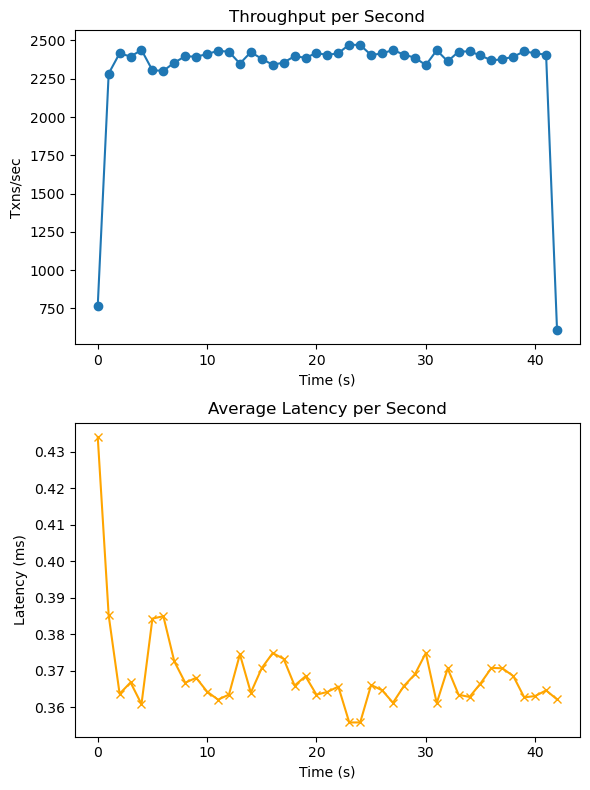

In [2]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
log_file = "../nuraft_logs/set_4nodes/set_server0.log"  # replace with your actual log file

# Regular expressions to extract input and commit timestamps
input_re = re.compile(r"\[InputCmd #(\d+)\] \[Time \(us\): (\d+)\]")
commit_re = re.compile(r"\[commitCmd #(\d+)\] \[Time \(us\): (\d+)\]")

input_times = {}
commit_times = {}

# Parse log file
with open(log_file, "r") as f:
    for line in f:
        line = line.strip()

        input_match = input_re.search(line)
        if input_match:
            idx = int(input_match.group(1))
            time_us = int(input_match.group(2))
            input_times[idx] = time_us
            continue

        commit_match = commit_re.search(line)
        if commit_match:
            idx = int(commit_match.group(1))
            time_us = int(commit_match.group(2))
            commit_times[idx] = time_us

# Compute valid latencies and per-second throughput
latencies = []
throughput_per_sec = defaultdict(int)
latency_per_sec = defaultdict(list)

for idx in sorted(input_times.keys()):
    if idx in commit_times:
        start = input_times[idx]
        end = commit_times[idx]
        if end < start:
            # Skip invalid or out-of-order entries
            print("invalid entry")
            continue

        latency = end - start  # in microseconds
        latencies.append(latency)

        sec = end // 1_000_000  # second bucket
        throughput_per_sec[sec] += 1
        latency_per_sec[sec].append(latency)

# Prepare data for plotting
seconds = sorted(throughput_per_sec.keys())
throughputs = [throughput_per_sec[s] for s in seconds]
avg_latencies = [sum(latency_per_sec[s]) / len(latency_per_sec[s]) / 1000 for s in seconds]  # in ms


seconds = np.array(seconds) - np.array(seconds)[0]
# Plotting
plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(seconds, throughputs, marker="o", label="Throughput")
plt.title("Throughput per Second")
plt.xlabel("Time (s)")
plt.ylabel("Txns/sec")

plt.subplot(2, 1, 2)
plt.plot(seconds, avg_latencies, marker="x", color="orange", label="Latency")
plt.title("Average Latency per Second")
plt.xlabel("Time (s)")
plt.ylabel("Latency (ms)")

plt.tight_layout()
plt.savefig('out1.png',dpi = 150, bbox_inches = 0)
plt.show()


# import random

# with open("commands.txt", "w") as f:
#     for _ in range(100000):
#         f.write(f"msg {random.randint(0,1)}\n")


invalid entry


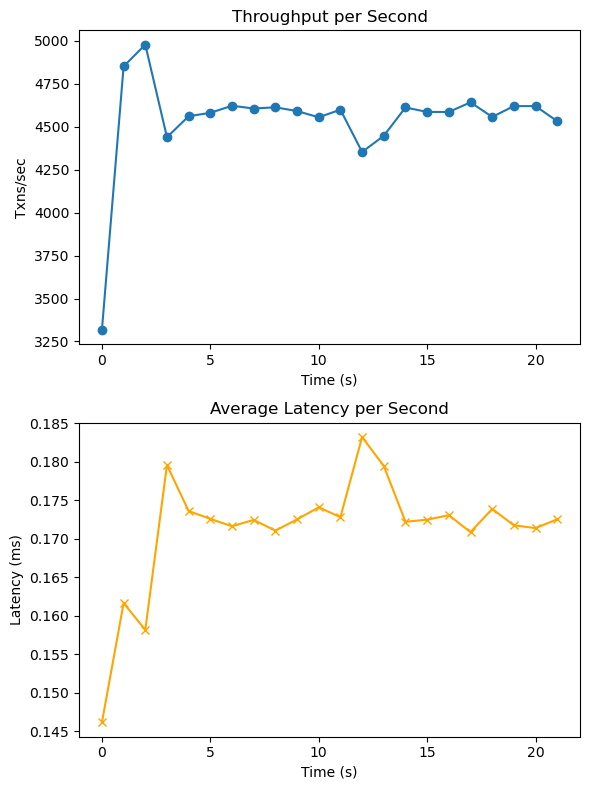

In [29]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
log_file = "build/examples/stackserver1.log"  # replace with your actual log file

# Regular expressions to extract input and commit timestamps
input_re = re.compile(r"\[InputCmd #(\d+)\] \[Time \(us\): (\d+)\]")
commit_re = re.compile(r"\[commitCmd #(\d+)\] \[Time \(us\): (\d+)\]")

input_times = {}
commit_times = {}

# Parse log file
with open(log_file, "r") as f:
    for line in f:
        line = line.strip()

        input_match = input_re.search(line)
        if input_match:
            idx = int(input_match.group(1))
            time_us = int(input_match.group(2))
            input_times[idx] = time_us
            continue

        commit_match = commit_re.search(line)
        if commit_match:
            idx = int(commit_match.group(1))
            time_us = int(commit_match.group(2))
            commit_times[idx] = time_us

# Compute valid latencies and per-second throughput
latencies = []
throughput_per_sec = defaultdict(int)
latency_per_sec = defaultdict(list)

for idx in sorted(input_times.keys()):
    if idx in commit_times:
        start = input_times[idx]
        end = commit_times[idx]
        if end < start:
            # Skip invalid or out-of-order entries
            print("invalid entry")
            continue

        latency = end - start  # in microseconds
        latencies.append(latency)

        sec = end // 1_000_000  # second bucket
        throughput_per_sec[sec] += 1
        latency_per_sec[sec].append(latency)

# Prepare data for plotting
seconds = sorted(throughput_per_sec.keys())
throughputs = [throughput_per_sec[s] for s in seconds]
avg_latencies = [sum(latency_per_sec[s]) / len(latency_per_sec[s]) / 1000 for s in seconds]  # in ms


seconds = np.array(seconds) - np.array(seconds)[0]
# Plotting
plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(seconds, throughputs, marker="o", label="Throughput")
plt.title("Throughput per Second")
plt.xlabel("Time (s)")
plt.ylabel("Txns/sec")

plt.subplot(2, 1, 2)
plt.plot(seconds, avg_latencies, marker="x", color="orange", label="Latency")
plt.title("Average Latency per Second")
plt.xlabel("Time (s)")
plt.ylabel("Latency (ms)")

plt.tight_layout()
plt.savefig('out2.png',dpi = 150, bbox_inches = 0)

plt.show()
